In [9]:
import pandas as pd

# Veriyi oku
file_path = 'C:/Users/BUSRA/Documents/Teknofest-2024/dataframe.csv'
data = pd.read_csv(file_path)

# Veriyi incele
print(data.head())


    KATEGORİ  HASTA ID DOSYA ADI ETİKET ADI ETİKET KOORDİNATLARI  \
0  Kategori1     10001   RCC.dcm     Normal                  NaN   
1  Kategori1     10001  RMLO.dcm     Normal                  NaN   
2  Kategori1     10002   LCC.dcm     Normal                  NaN   
3  Kategori1     10002  LMLO.dcm     Normal                  NaN   
4  Kategori1     10003   RCC.dcm     Normal                  NaN   

                                          DOSYA YOLU  
0  D:/Teknofest-2024/VERİLER\Kategori1\10001\RCC.dcm  
1  D:/Teknofest-2024/VERİLER\Kategori1\10001\RMLO...  
2  D:/Teknofest-2024/VERİLER\Kategori1\10002\LCC.dcm  
3  D:/Teknofest-2024/VERİLER\Kategori1\10002\LMLO...  
4  D:/Teknofest-2024/VERİLER\Kategori1\10003\RCC.dcm  


In [10]:
# KATEGORI sütunundaki benzersiz değerleri kontrol edin
unique_categories = data['KATEGORİ'].unique()
print(unique_categories)


['Kategori1' 'Kategori2Sag' 'Kategori2Sol' 'Kategori4Sag' 'Kategori4Sol'
 'Kategori5Sag' 'Kategori5Sol']


In [ ]:
# KATEGORI sütunundaki değerleri yeni kategori haritalamasına göre dönüştürme
kategori_mapping = {
    'Kategori1': 'birads1',
    'Kategori2Sag': 'birads2',
    'Kategori2Sol': 'birads2',
    'Kategori4Sag': 'birads4',
    'Kategori4Sol': 'birads4',
    'Kategori5Sag': 'birads5',
    'Kategori5Sol': 'birads5'
}

# 'KATEGORI' sütununu yeni etiketlerle güncelle
data['KATEGORI'] = data['KATEGORI'].map(kategori_mapping)

# Yeni BI-RADS kategorilerini sayısal değerlere dönüştürme
kategori_numeric = {'birads1': 1, 'birads2': 2, 'birads4': 4, 'birads5': 5}
data['KATEGORI_NUMERIC'] = data['KATEGORI'].map(kategori_numeric)

# Değişiklikleri kontrol et
print(data[['KATEGORI', 'KATEGORI_NUMERIC']].head())


  KATEGORI  KATEGORI_NUMERIC
0  birads1                 1
1  birads1                 1
2  birads1                 1
3  birads1                 1
4  birads1                 1


In [ ]:
# Kategoriye göre veri sayısını kontrol et
print(data['KATEGORI_NUMERIC'].value_counts())


KATEGORI_NUMERIC
1    2048
5    2014
4    1598
2    1354
Name: count, dtype: int64


In [ ]:
# ETIKET ADI sütunundaki benzersiz değerleri kontrol edin
unique_labels = data['ETIKET ADI'].unique()
print(unique_labels)


['Normal' 'Kitle' 'Kalsifikasyon']


In [ ]:
# 'Normal', 'Kitle' ve 'Kalsifikasyon' etiketlerini belirlemek için bir fonksiyon oluşturun
def classify_label(label):
    if label == 'Normal':
        return 'Normal'
    elif label == 'Kitle':
        return 'Kitle'
    elif label == 'Kalsifikasyon':
        return 'Kalsifikasyon'
    else:
        return 'Bilinmiyor'  # Beklenmedik bir etiket olasılığına karşı

# Yeni bir sütun ekleyerek verileri sınıflandırın
data['CLASSIFICATION'] = data['ETIKET ADI'].apply(classify_label)

# Değişiklikleri kontrol et
print(data[['ETIKET ADI', 'CLASSIFICATION']].head())


  ETIKET ADI CLASSIFICATION
0     Normal         Normal
1     Normal         Normal
2     Normal         Normal
3     Normal         Normal
4     Normal         Normal


In [ ]:
# Yeni sınıflandırmanın dağılımını kontrol et
print(data['CLASSIFICATION'].value_counts())


CLASSIFICATION
Kitle            2795
Normal           2710
Kalsifikasyon    1509
Name: count, dtype: int64


In [ ]:
import numpy as np

# Koordinatları normalize etmek için bir fonksiyon tanımlayın
def normalize_coordinates(coords, image_width, image_height):
    if pd.isna(coords):
        return np.nan  # Koordinat yoksa NaN döndür

    # Koordinat stringini (x1, y1; x2, y2; ...) şeklinde ayırın
    coord_pairs = coords.split(';')

    # Tüm koordinat çiftlerini işlemek ve normalize etmek için bir liste
    normalized_pairs = []

    for pair in coord_pairs:
        if pair.strip():  # Boş olmayan bir çift kontrolü
            x, y = map(float, pair.split(','))
            # Normalize et (x ve y değerlerini görüntü genişliği ve yüksekliği ile oranla)
            x_norm = (x + image_width / 2) / image_width
            y_norm = (y + image_height / 2) / image_height
            normalized_pairs.append((x_norm, y_norm))

    return normalized_pairs

# Örnek olarak tüm görüntülerin aynı boyutta olduğunu varsayalım (örneğin, 1024x1024)
image_width = 1024
image_height = 1024

# Koordinatları normalize edip yeni bir sütuna ekleyin
data['NORMALIZED_COORDINATES'] = data['ETIKET KOORDINATLARI'].apply(
    lambda x: normalize_coordinates(x, image_width, image_height)
)

# Değişiklikleri kontrol et
data[['ETIKET KOORDINATLARI', 'NORMALIZED_COORDINATES']].iloc[2060:2070]


,ETIKET KOORDINATLARI,NORMALIZED_COORDINATES
2060,"670.5146,463.2401;670.5146,646.6982;850.3914,6...","[(1.1547994140625, 0.95238291015625), (1.15479..."
2061,"417.2523,879.4003;417.2523,977.017;522.8369,97...","[(0.90747294921875, 1.35878935546875), (0.9074..."
2062,"1128.923,-665.6912;1128.923,-510.7321;1188.522...","[(1.6024638671875, -0.15008906249999998), (1.6..."
2063,"774.6526,-250.843;774.6526,-120.6672;904.8284,...","[(1.2564966796875, 0.25503613281250004), (1.25..."
2064,NaN,NaN
2065,NaN,NaN
2066,NaN,NaN
2067,NaN,NaN
2068,NaN,NaN
2069,NaN,NaN


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('ETIKET KOORDINATLARI').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Dosya yolunu kontrol et
file_path = data.loc[example_index, 'DOSYA YOLU']
print("Dosya yolu:", file_path)

# Dosyanın var olup olmadığını kontrol et
import os
print("Dosya mevcut mu?:", os.path.exists(file_path))


Dosya yolu: /content/drive/MyDrive/Colab Notebooks/VERİLER/Kategori2Sag/11030/RMLO.dcm
Dosya mevcut mu?: True


In [ ]:
# Kitle ve Kalsifikasyon etiketlerinin sayısını hesaplama
kitle_count = data[data['ETIKET ADI'] == 'Kitle'].shape[0]
kalsifikasyon_count = data[data['ETIKET ADI'] == 'Kalsifikasyon'].shape[0]

# Sonuçları yazdırma
print(f"Kitle sayısı: {kitle_count}")
print(f"Kalsifikasyon sayısı: {kalsifikasyon_count}")


Kitle sayısı: 2795
Kalsifikasyon sayısı: 1509


In [ ]:
# Sadece etiketli görüntülerin sayısını ve durumunu kontrol etme
labeled_images_count = 0

for index, row in data.iterrows():
    etiket_adi = row['ETIKET ADI']
    coords = row['NORMALIZED_COORDINATES']

    if etiket_adi != 'Normal' and isinstance(coords, list) and len(coords) > 0:
        labeled_images_count += 1
        print(f"Satır {index}: Etiket {etiket_adi}, Koordinatlar: {coords}")

print(f"Toplam etiketli görüntü sayısı: {labeled_images_count}")


In [ ]:
# Eksik veri kontrolü
print(data.isnull().sum())


KATEGORI                     0
HASTA ID                     0
DOSYA ADI                    0
ETIKET ADI                   0
ETIKET KOORDINATLARI      2710
DOSYA YOLU                   0
KATEGORI_NUMERIC             0
CLASSIFICATION               0
NORMALIZED_COORDINATES    2710
dtype: int64


In [ ]:
# "Normal" etiketli görüntüleri atla ve boş koordinatları kontrol et
filtered_data = data[(data['ETIKET ADI'] != 'Normal') & (data['NORMALIZED_COORDINATES'].notna())]


,KATEGORI,HASTA ID,DOSYA ADI,ETIKET ADI,ETIKET KOORDINATLARI,DOSYA YOLU,KATEGORI_NUMERIC,CLASSIFICATION,NORMALIZED_COORDINATES
2058,birads2,11030,RCC.dcm,Kitle,"1008.933,426.8723;1008.933,534.0561;1135.292,5...",/content/drive/MyDrive/Colab Notebooks/VERİLE...,2,Kitle,"[(1.4852861328125, 0.91686748046875), (1.48528..."
2059,birads2,11030,RCC.dcm,Kitle,"754.5869,-313.4725;754.5869,-177.532;895.3248,...",/content/drive/MyDrive/Colab Notebooks/VERİLE...,2,Kitle,"[(1.23690126953125, 0.19387451171874998), (1.2..."
2060,birads2,11030,RMLO.dcm,Kitle,"670.5146,463.2401;670.5146,646.6982;850.3914,6...",/content/drive/MyDrive/Colab Notebooks/VERİLE...,2,Kitle,"[(1.1547994140625, 0.95238291015625), (1.15479..."
2061,birads2,11030,RMLO.dcm,Kitle,"417.2523,879.4003;417.2523,977.017;522.8369,97...",/content/drive/MyDrive/Colab Notebooks/VERİLE...,2,Kitle,"[(0.90747294921875, 1.35878935546875), (0.9074..."
2062,birads2,11031,RCC.dcm,Kitle,"1128.923,-665.6912;1128.923,-510.7321;1188.522...",/content/drive/MyDrive/Colab Notebooks/VERİLE...,2,Kitle,"[(1.6024638671875, -0.15008906249999998), (1.6..."
...,...,...,...,...,...,...,...,...,...
7009,birads5,12719,LMLO.dcm,Kitle,"-693.9316,-327.6231;-693.9316,-134.1276;-531.2...",/content/drive/MyDrive/Colab Notebooks/VERİLE...,5,Kitle,"[(-0.177667578125, 0.18005556640624998), (-0.1..."
7010,birads5,12720,LCC.dcm,Kitle,"-727.322,-419.7589;-727.322,-50.79141;-379.371...",/content/drive/MyDrive/Colab Notebooks/VERİLE...,5,Kitle,"[(-0.210275390625, 0.09007919921875002), (-0.2..."
7011,birads5,12720,LMLO.dcm,Kitle,"-595.595,-382.3951;-595.595,-64.80284;-289.678...",/content/drive/MyDrive/Colab Notebooks/VERİLE...,5,Kitle,"[(-0.08163574218750003, 0.12656728515625), (-0..."
7012,birads5,12721,LCC.dcm,Kitle,"-524.7009,-961.3434;-524.7009,-541.2303;-65.25...",/content/drive/MyDrive/Colab Notebooks/VERİLE...,5,Kitle,"[(-0.012403222656250046, -0.4388119140625), (-..."


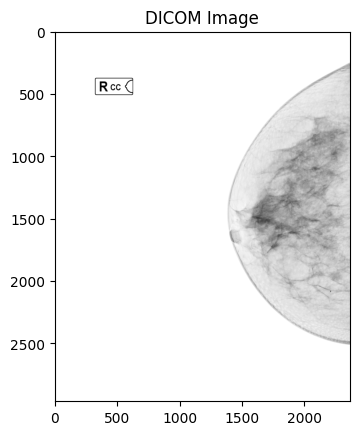

In [ ]:
from pydicom import dcmread
import matplotlib.pyplot as plt

def read_dicom_image(file_path):
    dicom_data = dcmread(file_path)
    image = dicom_data.pixel_array
    return image

# Örnek olarak ilk görüntüyü oku ve göster
first_image_path = filtered_data.iloc[0]['DOSYA YOLU']
image = read_dicom_image(first_image_path)

plt.imshow(image, cmap='gray')
plt.title('DICOM Image')
plt.show()


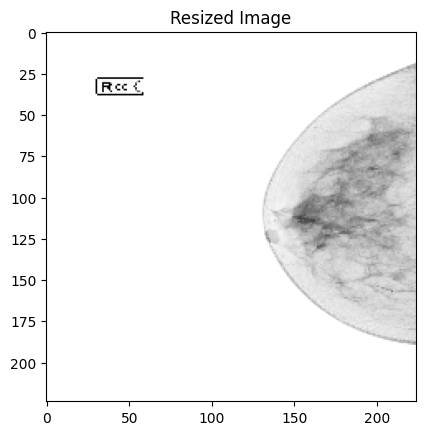

In [ ]:
import cv2

def resize_image(image, target_size=(224, 224)):
    resized_image = cv2.resize(image, target_size)
    return resized_image

# Görüntüyü yeniden boyutlandırma
resized_image = resize_image(image)
plt.imshow(resized_image, cmap='gray')
plt.title('Resized Image')
plt.show()


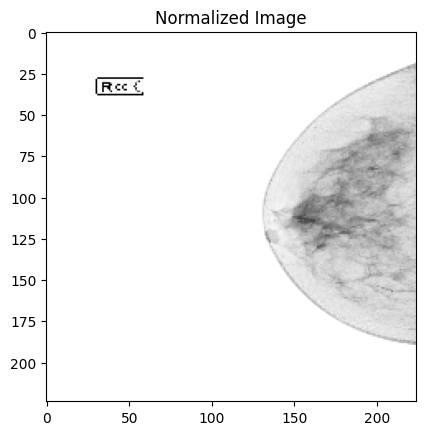

In [ ]:
def normalize_image(image):
    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return normalized_image

# Görüntüyü normalize etme
normalized_image = normalize_image(resized_image)
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.show()


In [ ]:
!pip install pydicom
!pip install matplotlib

In [ ]:
import pydicom
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

def read_dicom_files_to_memmap(directory_path, output_filename):
    """
    DICOM dosyalarını verilen dizin ve alt dizinlerden okur ve numpy memmap formatında disk üzerinde saklar.
    """
    images_list = []
    
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith('.dcm'):
                file_path = os.path.join(root, file)
                try:
                    dicom_data = pydicom.dcmread(file_path)
                    image_array = dicom_data.pixel_array
                    images_list.append(image_array)
                except Exception as e:
                    print(f"Dosya okunamadı: {file_path}, hata: {e}")
   
    sample_image = images_list[0]
    num_images = len(images_list)
    image_shape = sample_image.shape

    # Memmap dosyası oluştur
    memmap_array = np.memmap(output_filename, dtype='float32', mode='w+', shape=(num_images, *image_shape))
    
    for i, image in enumerate(images_list):
        memmap_array[i] = image
    
    return memmap_array

def resize_images_memmap(memmap_array, target_size=(512, 512)):
    """
    Memmap formatında disk üzerinde saklanan görüntüleri belirtilen boyuta yeniden boyutlandırır.
    """
    num_images = memmap_array.shape[0]
    resized_images = np.memmap('resized_images.dat', dtype='float32', mode='w+', shape=(num_images, *target_size))
    
    for i in range(num_images):
        try:
            resized_image = cv2.resize(memmap_array[i], target_size, interpolation=cv2.INTER_AREA)
            resized_images[i] = resized_image
        except Exception as e:
            print(f"Görüntü yeniden boyutlandırılamadı: {e}")
    
    return resized_images

def process_images_memmap(directory_path, target_size=(512, 512)):
    """
    Memmap formatında disk üzerinde saklanan görüntülerle tam veri temizleme sürecini işleten ana fonksiyon.
    """

    images_memmap = read_dicom_files_to_memmap(directory_path, 'images_memmap.dat')
    
    resized_images = resize_images_memmap(images_memmap, target_size)
    
    return resized_images

def show_images_memmap(memmap_array, num_images=5):
    """
    İlk num_images sayıda memmap formatındaki görüntüyü gösterir.
    """
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(memmap_array))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(memmap_array[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


main_directory_path = "C:/Users/BUSRA/Documents/Teknofest-2024/VERİLER" 
processed_images = process_images_memmap(main_directory_path)

show_images_memmap(processed_images)


In [ ]:
import pydicom
import dask.array as da
import cv2
import os
import matplotlib.pyplot as plt
from dask import delayed

def read_dicom_file(file_path):
    """
    Tek bir DICOM dosyasını okur ve numpy array formatında döndürür.
    """
    try:
        dicom_data = pydicom.dcmread(file_path)
        image_array = dicom_data.pixel_array
        return image_array
    except Exception as e:
        print(f"Dosya okunamadı: {file_path}, hata: {e}")
        return None

def read_dicom_files_dask(directory_path):
    """
    DICOM dosyalarını verilen dizin ve alt dizinlerden dask delayed formatında okur.
    """
    images = []
    
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith('.dcm'):
                file_path = os.path.join(root, file)
                image = delayed(read_dicom_file)(file_path)
                images.append(image)
    
    # Dask array oluşturma
    images = [img for img in images if img is not None]
    images_dask = da.stack(images, axis=0)
    return images_dask

def resize_images_dask(images_dask, target_size=(512, 512)):
    """
    Dask array formatındaki görüntüleri belirtilen boyuta yeniden boyutlandırır.
    """
    def resize(image):
        return cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)
    
    resized_images = da.map_blocks(resize, images_dask, dtype=images_dask.dtype)
    return resized_images

def process_images_dask(directory_path, target_size=(512, 512)):
    """
    Dask formatında tam veri temizleme sürecini işleten ana fonksiyon.
    """
    # 1. DICOM Dosyalarını Okuma ve Dask Array'e Dönüştürme
    images_dask = read_dicom_files_dask(directory_path)
    
    # 2. Görüntüleri Yeniden Boyutlandırma
    resized_images = resize_images_dask(images_dask, target_size)
    
    return resized_images

def show_images_dask(images_dask, num_images=5):
    """
    İlk num_images sayıda dask array formatındaki görüntüyü gösterir.
    """
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, images_dask.shape[0])):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images_dask[i].compute(), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Kullanım:
main_directory_path = "C:/Users/BUSRA/Documents/Teknofest-2024/VERİLER"  # Burada ana dizinin yolunu belirtin
processed_images = process_images_dask(main_directory_path)

# İşlenen görüntülerin ilk 5'ini göster
show_images_dask(processed_images)
